!pip install nibabel

In [90]:
import glob
import os, sys
import nibabel as nib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

def save_print_instance(*message):
    io = StringIO()
    print(*message, file=io, end="")
    return io.getvalue()

In [26]:
task1_derivatives_nii = glob.glob(r'C:/Users/parkm/Desktop/github/miccai_stroke_2022/data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives/**/*.nii.gz', recursive=True)

In [27]:
task1_rawdata_nii = glob.glob(r'C:/Users/parkm/Desktop/github/miccai_stroke_2022/data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/rawdata/**/*.nii.gz', recursive=True)

In [28]:
task2_test_data = glob.glob(r'C:/Users/parkm/Desktop/github/miccai_stroke_2022/data/task2.ATLAS_2.0/ATLAS_2/Testing/**/**/**/**/*.nii.gz', recursive=True)

In [29]:
task2_train_data = glob.glob(r'C:/Users/parkm/Desktop/github/miccai_stroke_2022/data/task2.ATLAS_2.0/ATLAS_2/Training/**/**/**/**/*.nii.gz', recursive=True)

In [44]:
total_dict = dict()

In [154]:
def save_summary_table(globed_nifti_file_paths, save_full_path_with_file_name):
    total_dict = dict()

    for i, nifti_path in enumerate(globed_nifti_file_paths):
        #print(i)
        #print(nifti_path)
        temp_dict = dict()
        
        img = nib.load(nifti_path)
        

        file_name = nifti_path.split('\\')[-1].rstrip('.nii.gz')
        temp_dict['file_name'] = file_name
        temp_dict['data_dtype'] = img.get_data_dtype()

        
        temp_dict['nifti_img_shape'] = img.shape

        img.get_data_dtype()

        temp_dict['img_affine_shape'] = img.affine.shape
        temp_dict['img_affine_metrix'] = np.round(img.affine)


        hdr = img.header
        hdr_info = save_print_instance(hdr)

        temp_dict['hdr_info'] = hdr_info.strip("<class 'nibabel.nifti1.Nifti1Header'> object, ")
        temp_dict['hdr.get_xyzt_units'] = hdr.get_xyzt_units()

        raw = hdr.structarr
        temp_dict['hdr_raw'] = raw
        temp_dict['3d_array_mean'] = img_array.mean()
        temp_dict['3d_array_std'] = img_array.std()
        temp_dict['3d_array_min'] = img_array.min()
        temp_dict['3d_array_max'] = img_array.min()

    total_dict[i] = temp_dict
        
    df_summary = pd.DataFrame(total_dict).T
    df_summary.to_csv(save_full_path_with_file_name)
        
    return None

In [155]:
save_summary_table(task1_derivatives_nii, './task1_derivatives_nii.csv')

In [156]:
save_summary_table(task1_rawdata_nii, './task1_rawdata_nii.csv')

In [ ]:
save_summary_table(task2_test_data, './task2_test_data.csv')

In [ ]:
save_summary_table(task2_test_data, './task2_train_data.csv')

In [141]:
pd.DataFrame(total_dict).T

,file_name,data_dtype,nifti_img_shape,img_affine_shape,img_affine_metrix,hdr_info,hdr.get_xyzt_units,hdr_raw,3d_array_mean,3d_array_std,3d_array_min,3d_array_max
0,sub-strokecase0003_ses-0001_msk,float64,"(112, 112, 72)","(4, 4)","[[-2.0, 0.0, -0.0, 123.0], [0.0, 2.0, -1.0, -9...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
1,sub-strokecase0005_ses-0001_msk,uint16,"(112, 112, 72)","(4, 4)","[[-2.0, -0.0, -0.0, 116.0], [-0.0, 2.0, -0.0, ...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
2,sub-strokecase0010_ses-0001_msk,uint16,"(112, 112, 72)","(4, 4)","[[-2.0, 0.0, 0.0, 102.0], [0.0, 2.0, -0.0, -89...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
3,sub-strokecase0013_ses-0001_msk,uint16,"(112, 112, 72)","(4, 4)","[[-2.0, 0.0, 0.0, 106.0], [0.0, 2.0, -1.0, -63...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
4,sub-strokecase0015_ses-0001_msk,uint16,"(112, 112, 72)","(4, 4)","[[-2.0, -0.0, -0.0, 108.0], [0.0, 2.0, -1.0, -...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,sub-strokecase0139_ses-0001_msk,float64,"(112, 112, 73)","(4, 4)","[[-2.0, -0.0, 0.0, 114.0], [-0.0, 2.0, -1.0, -...",='<'\nsizeof_hdr : 348\ndata_type :...,"(unknown, unknown)","(348, b'', b'', 0, 0, b'', 0, [ 3, 112, 112, ...",0.004288,0.065344,0,0
86,sub-strokecase0141_ses-0001_msk,int64,"(112, 112, 73)","(4, 4)","[[-2.0, 0.0, 0.0, 108.0], [-0.0, 2.0, -0.0, -7...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
87,sub-strokecase0144_ses-0001_msk,uint16,"(112, 112, 73)","(4, 4)","[[-2.0, 0.0, -0.0, 106.0], [0.0, 2.0, 0.0, -96...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0
88,sub-strokecase0146_ses-0001_msk,float64,"(112, 112, 73)","(4, 4)","[[-2.0, -0.0, -0.0, 126.0], [-0.0, 2.0, -1.0, ...",='<'\nsizeof_hdr : 348\ndata_type :...,"(mm, unknown)","(348, b'', b'', 0, 0, b'r', 0, [ 3, 112, 112,...",0.004288,0.065344,0,0


In [132]:
# img 객체에 nii.gz 파일 경로 입력해서 열기
img = nib.load(task1_derivatives_nii[3])

In [31]:
# shape 확인하기
img.shape

(112, 112, 72)

In [115]:
# dtype 확인하기
img_array = img.get_data()

C:\Users\parkm\AppData\Local\Temp/ipykernel_8380/1885271522.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_array = img.get_data()


In [133]:
img_array[:,:,:].mean()

0.004288238732993197

In [135]:
img_array.std()

0.06534408727315771

In [111]:
img.get_data_dtype()

dtype('<u2')

In [48]:
# 이미지의 affine metrix 확인하기
img.affine.shape

(4, 4)

In [54]:
np.round(img.affine)

array([[ -2.,   0.,  -0., 123.],
       [  0.,   2.,  -1., -90.],
       [ -0.,   1.,   2., -82.],
       [  0.,   0.,   0.,   1.]])

In [55]:
# nifti 이미지 헤더 확인하기
hdr = img.header

In [86]:
hdr

In [89]:


hdr_info = save_print_instance(hdr)


In [142]:
hdr_info

"<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'\nsizeof_hdr      : 348\ndata_type       : b''\ndb_name         : b''\nextents         : 0\nsession_error   : 0\nregular         : b'r'\ndim_info        : 0\ndim             : [  3 112 112  73   1   1   1   1]\nintent_p1       : 0.0\nintent_p2       : 0.0\nintent_p3       : 0.0\nintent_code     : none\ndatatype        : float64\nbitpix          : 64\nslice_start     : 0\npixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]\nvox_offset      : 0.0\nscl_slope       : nan\nscl_inter       : nan\nslice_end       : 0\nslice_code      : unknown\nxyzt_units      : 2\ncal_max         : 0.0\ncal_min         : 0.0\nslice_duration  : 0.0\ntoffset         : 0.0\nglmax           : 0\nglmin           : 0\ndescrip         : b''\naux_file        : b''\nqform_code      : aligned\nsform_code      : scanner\nquatern_b       : 0.005566106\nquatern_c       : -0.99907005\nquatern_d       : -0.039187826\nqoffset_x       : 109.6514\nqoffset_y       : -85.

In [94]:
hdr.get_xyzt_units?

Signature: hdr.get_xyzt_units()
Docstring: <no docstring>
File:      c:\programdata\anaconda3\lib\site-packages\nibabel\nifti1.py
Type:      method


In [95]:
# x,y,z unit 확인하기
hdr.get_xyzt_units()

('mm', 'unknown')

In [92]:
hdr.get_xyzt_units()[1]

'unknown'

In [96]:
# raw 헤더정보 액세스하기(고급 옵션)
raw = hdr.structarr

In [97]:
raw

array((348, b'', b'', 0, 0, b'r', 0, [  3, 112, 112,  72,   1,   1,   1,   1], 0., 0., 0., 0, 512, 16, 0, [-1.,  2.,  2.,  2.,  0.,  0.,  0.,  0.], 0., nan, nan, 0, 0, 2, 0., 0., 0., 0., 0, 0, b'', b'', 1, 0, 0.01405673, 0.98594135, 0.16242322, 122.66366, -90.06522, -81.59267, [0., 0., 0., 0.], [0., 0., 0., 0.], [0., 0., 0., 0.], b'', b'n+1'),
      dtype=[('sizeof_hdr', '<i4'), ('data_type', 'S10'), ('db_name', 'S18'), ('extents', '<i4'), ('session_error', '<i2'), ('regular', 'S1'), ('dim_info', 'u1'), ('dim', '<i2', (8,)), ('intent_p1', '<f4'), ('intent_p2', '<f4'), ('intent_p3', '<f4'), ('intent_code', '<i2'), ('datatype', '<i2'), ('bitpix', '<i2'), ('slice_start', '<i2'), ('pixdim', '<f4', (8,)), ('vox_offset', '<f4'), ('scl_slope', '<f4'), ('scl_inter', '<f4'), ('slice_end', '<i2'), ('slice_code', 'u1'), ('xyzt_units', 'u1'), ('cal_max', '<f4'), ('cal_min', '<f4'), ('slice_duration', '<f4'), ('toffset', '<f4'), ('glmax', '<i4'), ('glmin', '<i4'), ('descrip', 'S80'), ('aux_file', '

In [98]:
# data에 nii.gz 파일 array로 담기
data = img.get_fdata()

In [99]:
# get_fdata의 shape 확인하기
data.shape

(112, 112, 72)

In [ ]:

data.shape[1]/2

In [ ]:
layer_numb_list = []

In [ ]:
[int((data.shape[1]/2+20)-5*i) for i in range(9)]

In [ ]:
data.shape[2]

In [ ]:
plt.imshow(data[:,:,20])

In [ ]:
def save_nifti_images(input_nifti_path, axis, layer_numb_list, interval, save_path):
    
    
    file_name = input_nifti_path.split('\\')[-1].rstrip('.nii.gz')
    
    img = nib.load(input_nifti_path)
    data = img.get_fdata()
    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    
    if layer_numb_list==None:
        layer_numb_list = [int((data.shape[axis]/2+(interval*4))-interval*i) for i in range(9)]
        
        for ax, layer_numb in zip(axs.ravel(), layer_numb_list):
            if axis==2:
                sample = data[:,:,layer_numb]
            elif axis==1:
                sample = data[:,layer_numb,:]
            elif axis==0:
                sample = data[layer_numb,:,:]
            ax.imshow(sample, cmap='gray')
            
    else:
        for ax, layer_numb in zip(axs.ravel(), layer_numb_list):
            if axis==2:
                sample = data[:,:,layer_numb]
            elif axis==1:
                sample = data[:,layer_numb,:]
            elif axis==0:
                sample = data[layer_numb,:,:]
            ax.imshow(sample, cmap='gray')
    
    plt.savefig(os.path.join(save_path,file_name)+'.png', dpi=300)


In [ ]:
data.shape

In [104]:
task2_train_data[10]

'C:/Users/parkm/Desktop/github/miccai_stroke_2022/data/task2.ATLAS_2.0/ATLAS_2/Training\\R001\\sub-r001s006\\ses-1\\anat\\sub-r001s006_ses-1_space-MNI152NLin2009aSym_label-L_desc-T1lesion_mask.nii.gz'

In [103]:
save_nifti_images(task2_test_data[0], 2, None, 5, 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/result/')

NameError: name 'save_nifti_images' is not defined

In [101]:
import scipy.ndimage as ndi

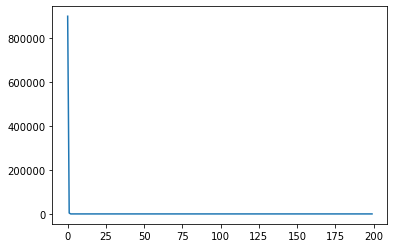

In [102]:
hist = ndi.histogram(data[:,:,:],min=0,max=200,bins=200)
plt.plot(hist)
plt.show()

https://sakurachaojun.github.io/PSYO3505/data/bioimage.html